<a href="https://colab.research.google.com/github/rahul-nauni/mlis1-poject/blob/main/arctic_ice_extent_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [116]:
# Author: Rahul Nauni
# importing libraries
import numpy as np
import pandas as pd
import glob
import os
from google.colab import drive
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('dark_background')

In [117]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [118]:
# defining column names and data types to use
columns_list = ['year', ' extent', ' mo']
columns_dtype_list = {'year': 'int64', 'extent': 'float64', 'mo': 'int64'}

In [119]:
# Load csv file
path = '/content/drive/MyDrive/ML'
files = glob.glob(os.path.join(path, 'N*extent*.csv'))
df = pd.concat((pd.read_csv(f, na_values = -9999.00, usecols=columns_list, dtype=columns_dtype_list, index_col=None) for f in files),axis=0)

In [120]:
# remove special character from column names
df.columns = df.columns.str.replace(' ', '')

In [121]:
# imputing missing values with mean value
def impute_missing(df):
  for col in df.select_dtypes(include=['int64', 'float64']).columns:
    df.loc[:, col] = df.loc[:,col].fillna(round(np.mean(df.loc[:, col]),2))

In [122]:
impute_missing(df)

In [123]:
# check for null values
df.isna().sum()

year      0
mo        0
extent    0
dtype: int64

In [124]:
# we will implement linear regression model by using year 1978-2022 as our input feature
# Year avg. Arctic ice extent will be our target variable
seaice_df = df.groupby(['year']).agg({'extent': 'mean'}).reset_index()

In [125]:
seaice_df.head()

,year,extent
0,1978,12.660000
1,1979,12.350000
2,1980,12.348333
3,1981,12.146667
4,1982,12.467500


In [126]:
# treat 'year' as independent/predictor variable and 'extent' as target variable
X = np.asarray(seaice_df.loc[:,'year'])
y = np.asarray(seaice_df.loc[:,'extent'])

In [127]:
def plot_data(xvals, yvals):
  plt.scatter(x=xvals, y=yvals, label='Data points')
  plt.xlabel('Year', fontsize=11) 
  plt.ylabel('Extent', fontsize=11)
  plt.title('Arctic Ice Extent dataset', fontsize=15)
  plt.legend(fontsize='11', loc='best', fancybox=True, shadow=True)
  plt.show()

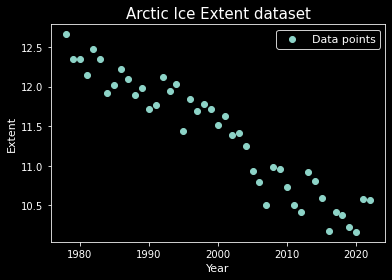

In [128]:
plot_data(X, y)

## Least squares implemented using normal equations

In [129]:
X

array([1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988,
       1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       2022])

In [130]:
X.shape

(45,)

In [131]:
# reshaping X 
X = np.reshape(np.ravel(X), (X.size,1))

In [132]:
X.shape

(45, 1)

In [133]:
# appending 1's in first column which serves as bias or input to 'y intercept' in our regression model
# X_des_mat is our design matrix
X_des_mat = np.concatenate([np.ones_like(X, dtype='int64'), X])

In [134]:
X_des_mat = np.reshape(X_des_mat, (2,-1)).T

In [135]:
# print design matrix
X_des_mat

array([[   1, 1978],
       [   1, 1979],
       [   1, 1980],
       [   1, 1981],
       [   1, 1982],
       [   1, 1983],
       [   1, 1984],
       [   1, 1985],
       [   1, 1986],
       [   1, 1987],
       [   1, 1988],
       [   1, 1989],
       [   1, 1990],
       [   1, 1991],
       [   1, 1992],
       [   1, 1993],
       [   1, 1994],
       [   1, 1995],
       [   1, 1996],
       [   1, 1997],
       [   1, 1998],
       [   1, 1999],
       [   1, 2000],
       [   1, 2001],
       [   1, 2002],
       [   1, 2003],
       [   1, 2004],
       [   1, 2005],
       [   1, 2006],
       [   1, 2007],
       [   1, 2008],
       [   1, 2009],
       [   1, 2010],
       [   1, 2011],
       [   1, 2012],
       [   1, 2013],
       [   1, 2014],
       [   1, 2015],
       [   1, 2016],
       [   1, 2017],
       [   1, 2018],
       [   1, 2019],
       [   1, 2020],
       [   1, 2021],
       [   1, 2022]])

We'll calculate weights for our model using following formula:

$ w = ( X^T X )^{-1} X^T y $ 

**note:** this method requires X to have full column rank i.e., columns of matrix X must be linearly independent

In [136]:
nrows, ncols = X_des_mat.shape

In [137]:
X_des_mat_rank = np.linalg.matrix_rank(X_des_mat)

In [138]:
# check if design matrix has full column rank
if nrows >= ncols == X_des_mat_rank:
  weights = np.matmul(np.matmul(np.linalg.inv(np.matmul(X_des_mat.transpose(),X_des_mat)),X_des_mat.transpose()),y)
  weights = np.reshape(weights, (-1,1))

In [139]:
print(weights)

[[ 1.17496858e+02]
 [-5.30554458e-02]]


In [140]:
predictions = np.matmul(X_des_mat, weights)

In [141]:
# fit regression line through data
def plot_model(X, y, predictions):
  plt.figure(figsize=(5,5))
  plt.scatter(X, y, label='data points')
  plt.xlabel('Year', fontsize=10)
  plt.ylabel('Extent', fontsize=10)
  plt.title('Fitted Model', fontsize=15)
  plt.plot(X, predictions, '-', color='red', label='Regression line')
  plt.legend(fontsize='11', loc='best', fancybox=True, shadow=True)
  plt.show()

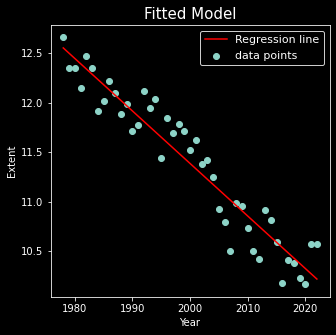

In [142]:
plot_model(X, y, predictions)

Making predictions

In [143]:
X_new = np.array([1980,1981,1982,1983,1984,1985])

In [144]:
X_new.shape

(6,)

In [145]:
X_new = np.reshape(X_new, (-1,1))

In [146]:
X_new

array([[1980],
       [1981],
       [1982],
       [1983],
       [1984],
       [1985]])

In [147]:
X_new_des_mat = np.concatenate([np.ones_like(X_new, dtype='int64'), X_new])

In [148]:
X_new_des_mat

array([[   1],
       [   1],
       [   1],
       [   1],
       [   1],
       [   1],
       [1980],
       [1981],
       [1982],
       [1983],
       [1984],
       [1985]])

In [149]:
X_new_des_mat = np.reshape(X_new_des_mat, (2,-1)).transpose()

In [150]:
X_new_des_mat

array([[   1, 1980],
       [   1, 1981],
       [   1, 1982],
       [   1, 1983],
       [   1, 1984],
       [   1, 1985]])

In [151]:
predictions = np.matmul(X_new_des_mat, weights)

In [152]:
pd.DataFrame(data=predictions, columns=['extent predictions'])

,extent predictions
0,12.447075
1,12.394020
2,12.340964
3,12.287909
4,12.234853
5,12.181798


## Gradient Descent Implementation

### Model

$ \hat{y} =  \theta_0 + \theta_1x  $


### Loss Function

**MSE Loss**

$ L(y, \hat{y}) = 1/N \sum_{i=1}^{N} (y_i - \hat{y}_i)^2 $

$ L(y,x,\theta) = 1/N \sum_{i=1}^{N} (y_i - (\theta_0 + \theta_1x_i))^2 $

**L2 Loss**


$ L(\theta) = 1/2N \sum_{i=1}^{N} (y_i  - \hat{y}_i)^2 + λ/2N \sum_{j=1}^{P}{\theta_j}^2 $


In [153]:
# method to compute mse loss
def compute_loss(X, y, weights):
  n = np.shape(X)[0]
  error = y - predict(X, weights)

  weights = weights.reshape(-1,1)
  loss = np.sum(error ** 2) / n
  return loss

In [154]:
def compute_l2_loss(X, y, weights, lambda_value):
  # regularisation term
  n = int(np.shape(X)[0])
  reg_term =  (lambda_value / 2 * n) * np.sum(np.matmul(weights, weights.T))
  
  error = y - predict(X, weights)

  #weights = weights.reshape(-1,1)
  loss = np.sum(error ** 2) / (2 * n) + reg_term
  return loss

### Derivative computation

Calculation of partial derivatives for every parameter:

$ ∂L / ∂\theta_0 =  -2/N \sum_{i=1}^{N} (y_i - (\theta_0 + \theta_1x_i)) $

$ ∂L / ∂\theta_1 =  -2/N \sum_{i=1}^{N} x_i(y_i - (\theta_0 + \theta_1x_i)) $

**Derivative of L2 loss**


$ ∂L(\theta) / ∂θ_0 = -1/N \sum_{i=1}^{N} (y_i - (\theta_0 + \theta_1x_i)) + λ/N \sum_{j=1}^{P} \theta_j $

In [155]:
# method to compute gradients of subsets of all observations/batches
def compute_gradient(X, error, weights, lambda_value):
  n = len(X)
  #gradient = (-2 / n) * np.sum(np.matmul(X.T, error))
  gradient = (-1 / n) * (np.sum(np.matmul(X.T,error)) + (lambda_value * weights))
  #gradient = gradient.reshape(len(np.array(gradient)), -1)
  return gradient

In [156]:
# to find optimum weights, we need an update method
def update_weights(weights, step_size):
    weights = weights - step_size
    return weights

In [157]:
# method for making predictions
def predict(X, weights):
    return np.matmul(X, weights)

In [158]:
# method to split data into training and testing set
def train_test_split(X,y,split):
  X_rand = np.random.rand(X.shape[0]) 
  y_rand = np.random.rand(y.shape[0])

  X_split = X_rand < np.percentile(X_rand, split)
  y_split = y_rand < np.percentile(y_rand, split)

  X_train = X[X_split]
  X_test = X[~ X_split]
  y_train = y[y_split]
  y_test = y[~ y_split]

  return X_train, X_test, y_train, y_test

In [159]:
# Performing stochastic gradient descent
def gradient_descent(X, y, max_iterations, batch_size, lambda_value, learning_rate, tolerance):
  # X : Input matrix with added bias units
  # y: target vector
  # Hyper parameters
  # max_iterations : maximum number of iterations
  # batch_size : mini batch size 
  # lambda_value : regularisation weight
  # learning_rate : size of steps to be raken in a direction
  # tolerance : fixed constant to be checked for convergance
  
  # number of observations and features
  nrows = X.shape[0]
  ncols = X.shape[1]
  
  # randomized initialization for weights
  initial_weights = np.array([[np.random.randint(100)],[-1]])
  #initial_weights = np.array(np.random.normal(scale=ncols, size=(ncols,1)).astype('float64'))

  loss_history = np.zeros(max_iterations)
  theta_history = np.zeros((max_iterations,ncols))

  weights = np.array(initial_weights)
  current_loss = None
  epoch = 0
  converged = False
  while not converged and epoch < max_iterations:
  #for iter in range(max_iterations):
    # for each iteration
    # we calculate gradient of loss function wrt each parameter
    # calculate current loss
    # update weights for each feature and repeat until convergence or until we have reached max_iterations.

    gradient_sum_squares = 0
    # algorithm requires randomly selected observations for each mini-batch
    # so we neeed to shuffle X and y to generate random samples
    Xy = np.concatenate([X, y], axis=1)
    np.random.shuffle(Xy)
    X, y = Xy[:,:-1], Xy[:,-1:]

    # Mini batch starts here
    for i in range(int(np.ceil(nrows/batch_size))):
      start, stop = batch_size*i, np.min([batch_size*(i+1), nrows])
      # defining mini-batches
      X_batch, y_batch = X[start:stop], y[start:stop]

      # calculate error using current weights
      error = y_batch - predict(X_batch, weights)
      # computing gradients
      gradient = compute_gradient(X_batch, error, weights, lambda_value) 
      gradient_sum_squares = gradient_sum_squares + (gradient ** 2)
      # calculate step size to move in negative gradient direction
      step_size = learning_rate * gradient
      # update weights
      weights = update_weights(weights, step_size)
      # calculate loss using current weights
      error = y_batch - predict(X_batch, weights)
      current_loss = compute_l2_loss(X_batch, y_batch, weights, lambda_value)
      # logging progress
      loss_history[epoch] = current_loss
      theta_history[epoch, :] = weights.T
      gradient_magnitude = np.sqrt(gradient_sum_squares)
      # Checking for convergence
      # stop when magnitude of gradient vector is smaller than tolerance
      if np.all(np.abs(gradient_magnitude) <= tolerance):
        converged = True
      if epoch % 20 == 0:
        # logging current model parameters and loss
        print(f"Mini-Batch: {i} | Epoch: {epoch} ----> Loss: {current_loss}")
    if epoch % 20 == 0:
      print("--------------------------------------------------------")
    epoch +=  1
  # return learned parameters
  return weights, loss_history, theta_history


In [160]:
# treat 'year' as independent/predictor variable and 'extent' as target variable
X = np.asarray(seaice_df.loc[:,'year'])
y = np.asarray(seaice_df.loc[:,'extent'])

In [161]:
# Reshaping X (input matrix) to include bias term
X_data = np.reshape(np.ravel(X), (X.size,1))
X_data = np.concatenate([np.ones_like(X_data, dtype='float64'), X_data])
X_data = np.reshape(X_data, (2,-1)).transpose()
# Reshaping y (target vector)
y_data = np.reshape(np.ravel(y), (y.size,1))

In [162]:
estimated_weights, loss_history, theta_history = gradient_descent(X_data, y_data, max_iterations=500, batch_size=32, lambda_value=0.01, learning_rate=7e-9, tolerance=2e-8)

Mini-Batch: 0 | Epoch: 0 ----> Loss: 1744039.1518692786
Mini-Batch: 1 | Epoch: 0 ----> Loss: 1638828.5346637964
--------------------------------------------------------
Mini-Batch: 0 | Epoch: 20 ----> Loss: 180246.0741975245
Mini-Batch: 1 | Epoch: 20 ----> Loss: 170335.23320875296
--------------------------------------------------------
Mini-Batch: 0 | Epoch: 40 ----> Loss: 19797.95493419985
Mini-Batch: 1 | Epoch: 40 ----> Loss: 17960.230975485218
--------------------------------------------------------
Mini-Batch: 0 | Epoch: 60 ----> Loss: 3274.889997610958
Mini-Batch: 1 | Epoch: 60 ----> Loss: 2350.89057900858
--------------------------------------------------------
Mini-Batch: 0 | Epoch: 80 ----> Loss: 1576.164479417779
Mini-Batch: 1 | Epoch: 80 ----> Loss: 744.2769278916307
--------------------------------------------------------
Mini-Batch: 0 | Epoch: 100 ----> Loss: 1401.3426677661896
Mini-Batch: 1 | Epoch: 100 ----> Loss: 580.0221736371375
---------------------------------------

In [163]:
estimated_weights

array([[ 9.29592122e+01],
       [-4.07881588e-02]])

In [164]:
predictions = predict(X_data, estimated_weights)

In [165]:
pd.DataFrame(data=predictions,columns=['Predictions']).head()

,Predictions
0,12.280234
1,12.239446
2,12.198658
3,12.157870
4,12.117082


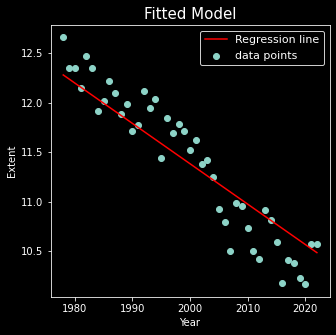

In [166]:
plot_model(X, y, predictions)

In [167]:
# Visualizing change in loss function and weights wrt epochs
def plot_gradient_descent(theta_history, loss_history):
  fig, ax1 = plt.subplots()

  # plot thetas over time
  color='tab:blue'
  ax1.plot(theta_history[:,0], label='$\\theta_{0}$', linestyle='--', color=color)
  ax1.plot(theta_history[:,1], label='$\\theta_{1}$', linestyle='-', color=color)
  # ax1.legend()
  ax1.set_xlabel('Iterations'); ax1.set_ylabel('$\\theta$', color=color);
  ax1.tick_params(axis='y', labelcolor=color)

  # plot loss function over time
  color='tab:red'
  ax2 = ax1.twinx()
  ax2.plot(loss_history, label='Loss function', color=color)
  ax2.set_title('Values of $\\theta$ and $L(\\theta)$ over iterations')
  ax2.set_ylabel('Loss: $L(\\theta)$', color=color)
  ax1.tick_params(axis='y', labelcolor=color)

  # ax2.legend();
  fig.legend();

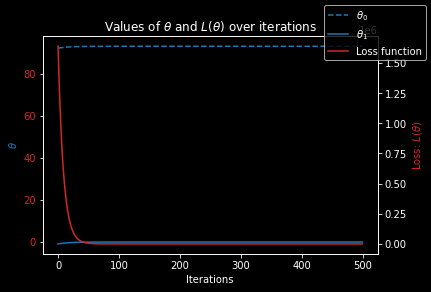

In [168]:
plot_gradient_descent(theta_history, loss_history)